In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
import pickle as pkl

In [2]:
!pip install shap
import shap

In [3]:
insurance_data = pd.read_csv('insurance.csv')

In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance_data.shape

(1338, 7)

In [9]:
## So we have 1338 rows and 7 columns

In [10]:
insurance_data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [11]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
#clean data 

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

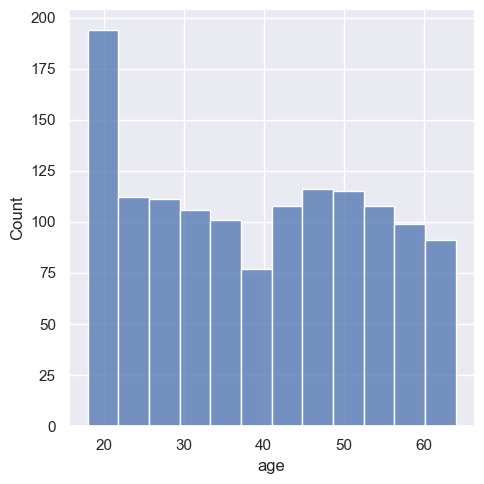

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

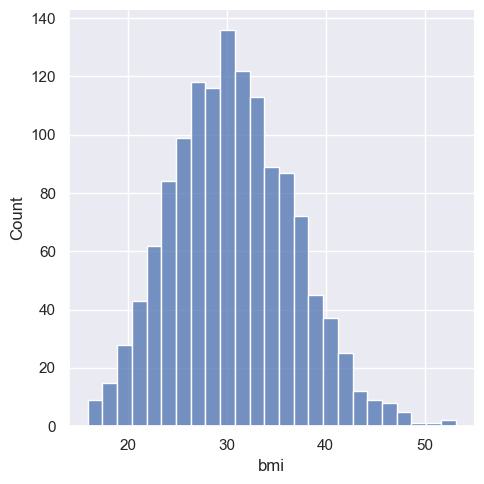

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

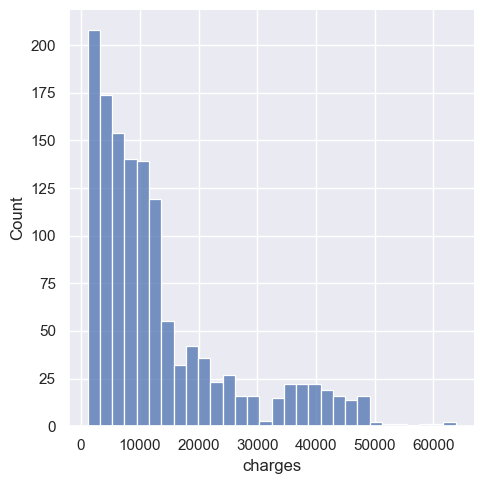

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['charges'])
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

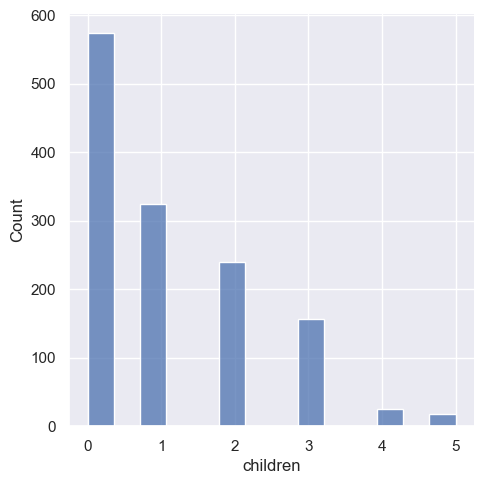

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['children'])
plt.show()

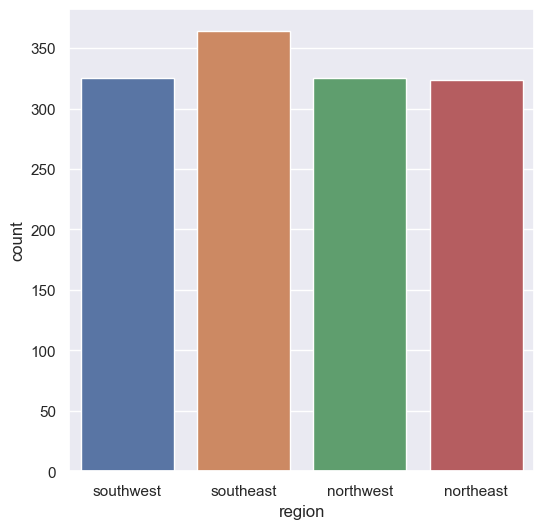

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data['region'],data = insurance_data)
plt.show()

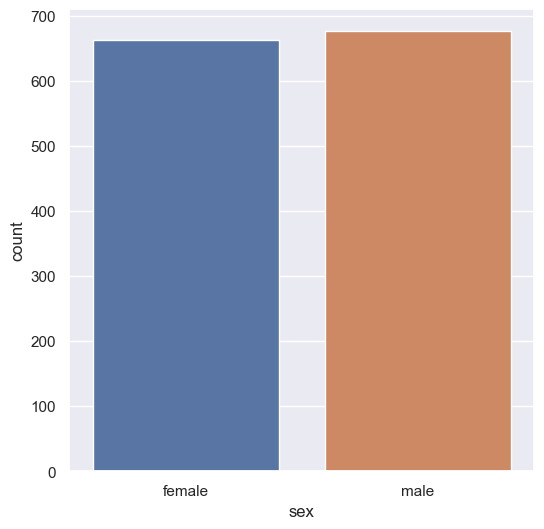

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data['sex'],data = insurance_data)
plt.show()

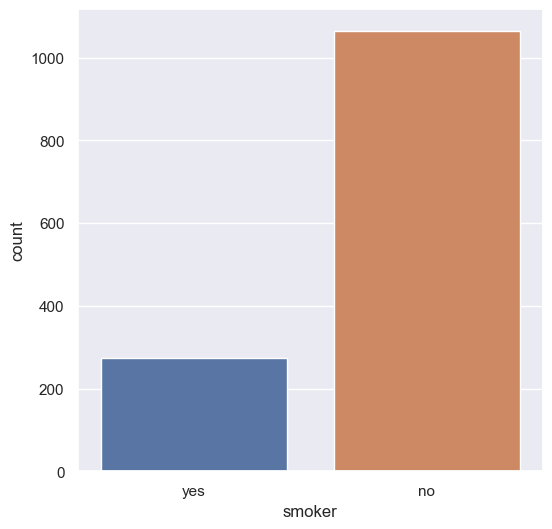

In [19]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data['smoker'],data = insurance_data)
plt.show()

In [20]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [21]:
#So almost all columns are evenly distributed except for smoker column

In [22]:
#Converting categorical columns into numerical columns

insurance_data.replace({'sex':{'female':0,'male':1}}, inplace=True)
insurance_data.replace({'region':{'southeast':1,'southwest':2,'northeast':3,'northwest':4}}, inplace=True)
insurance_data.replace({'smoker':{'no':0,'yes':1}}, inplace=True)

In [23]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


In [24]:
input_data = insurance_data.drop(columns='charges')
output_data = insurance_data['charges']

In [25]:
input_data

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,4
4,32,1,28.880,0,0,4
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,4
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,2


In [26]:
output_data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
input_train, input_test, output_train, output_test = train_test_split(input_data, output_data, test_size=0.2)

In [28]:
print(input_data.shape,input_train.shape,input_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [29]:
print(output_data.shape,output_train.shape,output_test.shape)

(1338,) (1070,) (268,)


In [30]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [31]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [32]:
# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,  # Use all processors
    verbose=2,
    scoring='r2'
)

In [33]:
# Fitting GridSearchCV to the training data
print("Starting GridSearch...")
grid_search.fit(input_train, output_train)

Starting GridSearch...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [34]:
# Displaying the best parameters and R² score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R² Score from GridSearch: {grid_search.best_score_:.2f}")

Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R² Score from GridSearch: 0.86


In [35]:
# Using the best model to make predictions on the test set
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(input_test)

In [36]:
# Evaluating the model's performance on the test data
r2 = r2_score(output_test, test_predictions)
mae = mean_absolute_error(output_test, test_predictions)
rmse = np.sqrt(mean_squared_error(output_test, test_predictions))

In [37]:
print(f"Test R² Score: {r2:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")

Test R² Score: 0.84
Test MAE: 2641.16
Test RMSE: 4653.07


In [38]:
# Feature Importance from RandomForest
feature_importance = best_model.feature_importances_
features = input_data.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [39]:
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
    Feature  Importance
4    smoker    0.693824
2       bmi    0.176508
0       age    0.114575
3  children    0.010514
5    region    0.003934
1       sex    0.000645


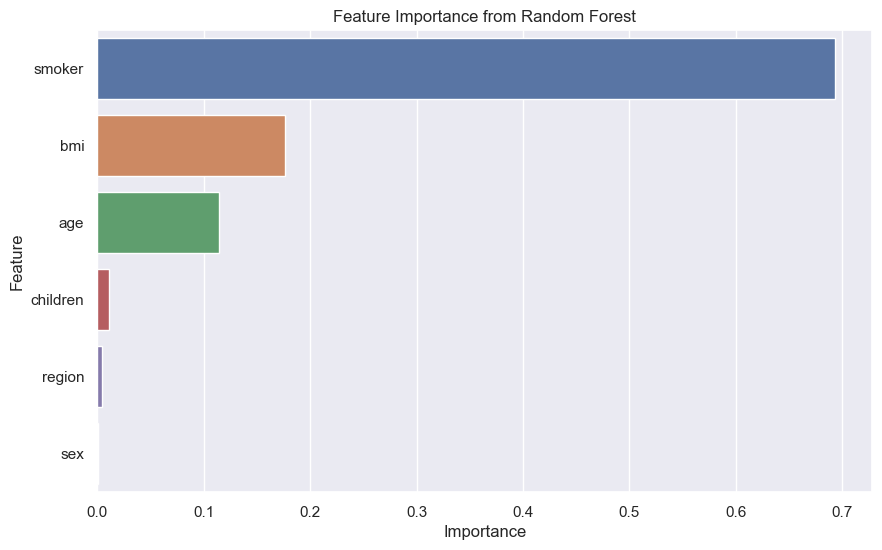

In [40]:
# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [41]:
# SHAP Values for Model Explainability
explainer = shap.Explainer(best_model, input_train)
shap_values = explainer(input_test)


Generating SHAP summary plot...


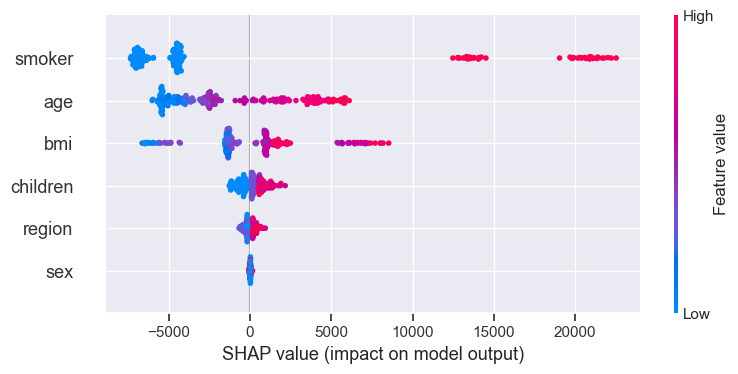

In [42]:
# Plotting SHAP summary
print("\nGenerating SHAP summary plot...")
shap.summary_plot(shap_values, input_test)

In [43]:
# Save the best model using pickle
with open('Best_Insurance_Model.pkl', 'wb') as file:
    pkl.dump(best_model, file)
print("Best model saved successfully!")

Best model saved successfully!
